In [148]:
import matplotlib.pyplot as plt
import numpy as np
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [150]:
img_path = r'images/test4.png'
img = plt.imread(img_path)

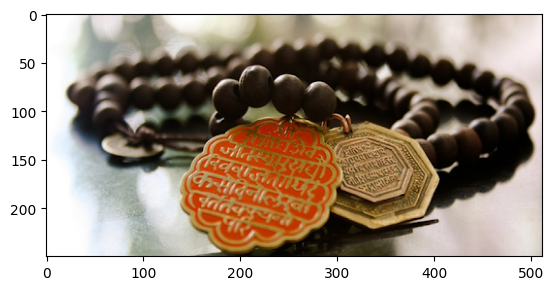

In [152]:
plt.imshow(img)

In [154]:
if 'jpg' in img_path :
    img /= 255

In [156]:
img.shape

(250, 512, 3)

In [158]:
original_img = img
img = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))

In [160]:
img.shape

(128000, 3)

In [239]:
def K_means_clustering(data, total_clusters, max_iters=10, plot_history=True):
    # selecting random initial centroids
    rand_indx = np.random.permutation(data.shape[0])
    initial_centroids = data[rand_indx[:total_clusters]]
    
    final_indx = np.zeros(data.shape[0])
    final_centroids = initial_centroids
    for i in range(max_iters):

        # finding minimum distance between every point and centroids
        indx = np.zeros(data.shape[0],dtype=int)
        for j in range(data.shape[0]):
            distance = []
            for k in range(final_centroids.shape[0]):
                dist = np.linalg.norm(data[j]-final_centroids[k])
                distance.append(dist)
            indx[j] = np.argmin(distance)
        final_indx = indx
        
        # find new centroids
        centroids = np.zeros((total_clusters, data.shape[1]))
        for l in range(total_clusters):
            examples = data[final_indx==l]
            centroids[l] = np.mean(examples, axis=0)
        final_centroids = centroids

        print(f"-Iteration {i+1}/{max_iters} ---------- done")

    return final_centroids, final_indx

In [241]:
import time
start = time.time()

total_clusters = 32
max_iters = 20
centroids, indx = K_means_clustering(img, total_clusters, max_iters)

stop = time.time()
print(f"Total time required for training is {(stop-start)/60:.2f} min")

-Iteration 1/20 ---------- done
-Iteration 2/20 ---------- done
-Iteration 3/20 ---------- done
-Iteration 4/20 ---------- done
-Iteration 5/20 ---------- done
-Iteration 6/20 ---------- done
-Iteration 7/20 ---------- done
-Iteration 8/20 ---------- done
-Iteration 9/20 ---------- done
-Iteration 10/20 ---------- done
-Iteration 11/20 ---------- done
-Iteration 12/20 ---------- done
-Iteration 13/20 ---------- done
-Iteration 14/20 ---------- done
-Iteration 15/20 ---------- done
-Iteration 16/20 ---------- done
-Iteration 17/20 ---------- done
-Iteration 18/20 ---------- done
-Iteration 19/20 ---------- done
-Iteration 20/20 ---------- done
Total time required for training is 6.06 min


In [242]:
indx.shape

(128000,)

In [243]:
indx = np.zeros(img.shape[0], dtype=int)
for i in range(img.shape[0]):
    distance = []
    for j in range(centroids.shape[0]):
        dist = np.linalg.norm(img[i]-centroids[j])
        distance.append(dist)
    indx[i] = np.argmin(distance)

In [244]:
indx.shape

(128000,)

In [245]:
recovered_img = centroids[indx, :]

In [246]:
recovered_img.shape

(128000, 3)

In [247]:
compressed_img = np.reshape(recovered_img, original_img.shape)

In [248]:
compressed_img.shape

(250, 512, 3)

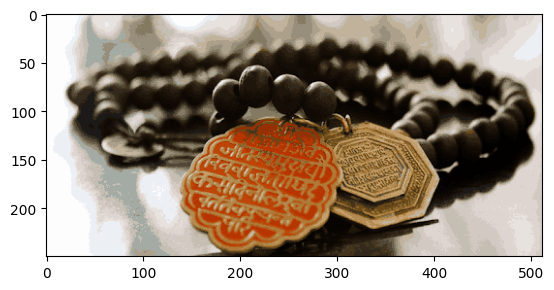

In [249]:
plt.imshow(compressed_img)

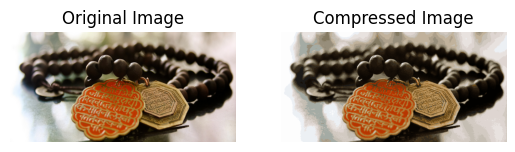

In [250]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(original_img)
ax[0].set_title("Original Image")
ax[0].set_axis_off()

ax[1].imshow(compressed_img)
ax[1].set_title("Compressed Image")
ax[1].set_axis_off()

In [251]:
plt.imsave('outputs/compressed_test4_(32,20).png', compressed_img)